In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

In [2]:
df_train=pd.read_csv('train_loan.csv')
df_train_org=df_train
df_train.rename(columns=lambda x : x.lower(),inplace=True)
df_test=pd.read_csv('test.csv')
df_test.rename(columns=lambda x : x.lower(),inplace=True)

In [3]:
print(df_test.shape)
print(df_train.shape)


(367, 12)
(614, 13)


In [4]:
df_train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [5]:
df_test.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [6]:
#removing loan_status column form the train data set
#combine data from test and train 
df_train.drop('loan_status',axis=1,inplace=True)
df_combine=df_train.append(df_test)
df_combine.reset_index(inplace=True)
df_combine.drop(['loan_id','index'],axis=1,inplace=True)

In [7]:
df_combine.shape

(981, 11)

In [8]:
df_combine.isnull().sum()

gender               24
married               3
dependents           25
education             0
self_employed        55
applicantincome       0
coapplicantincome     0
loanamount           27
loan_amount_term     20
credit_history       79
property_area         0
dtype: int64

In [9]:
# No duplicates found 
df_combine.duplicated().sum()

2

In [10]:
#Imputing missig values 
#imputing gender with most frequent value 
df_combine['gender']=df_combine['gender'].fillna('Male')
#imputing marital status with 'YES'
df_combine['married']=df_combine['married'].fillna('Yes')
#imputing self_employed with most frequent value 'No'
df_combine['self_employed'].fillna('No',inplace=True)




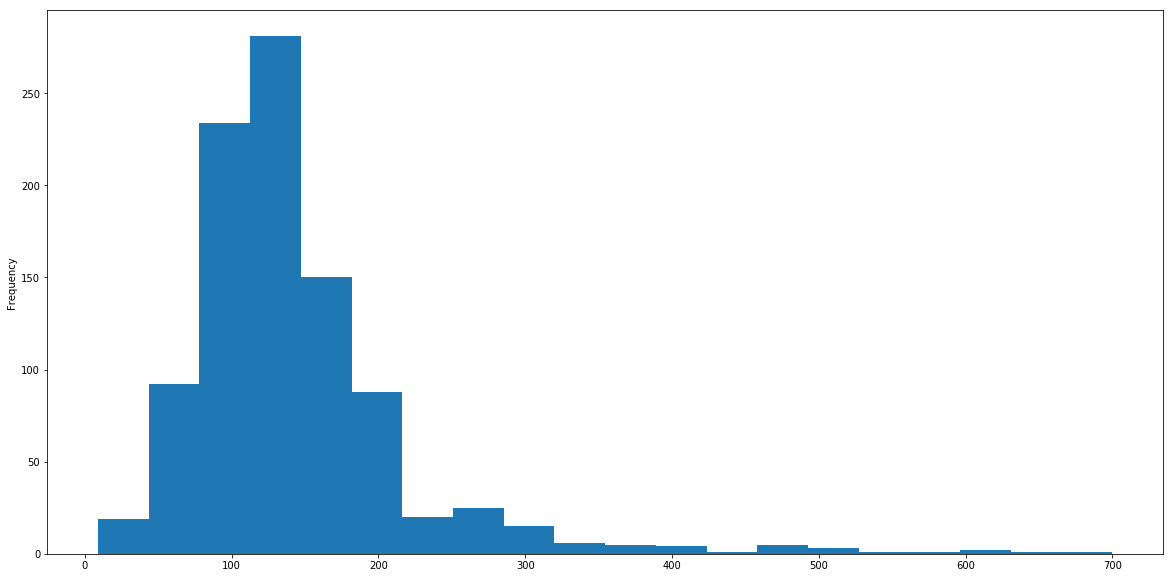

In [11]:
df_combine['loanamount'].plot(kind='hist',bins=20,figsize=(20,10))

In [12]:
df_combine['loanamount'].fillna(df_combine['loanamount'].median(),inplace=True)

In [13]:
df_combine.isnull().sum()

gender                0
married               0
dependents           25
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term     20
credit_history       79
property_area         0
dtype: int64

In [14]:
df_combine['loan_amount_term'].fillna(360.0,inplace=True)
df_combine['credit_history'].fillna(2,inplace=True)

In [15]:
numerical_column=df_combine.select_dtypes(include=['number','float','int64']).columns

In [16]:
categorical_column=[e for e in df_combine.columns if e not in numerical_column ]

In [17]:
numerical_column

Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history'],
      dtype='object')

In [18]:
#one hot encoding for categorical columns 
df_combine['gender']=df_combine['gender'].map({'Male':1,'Female':0})
df_combine['married']=df_combine['married'].map({'Yes':1,'No':0})
df_combine['education'] =df_combine['education'].map({'Graduate':1,'Not Graduate':0})
df_combine['self_employed'] = df_combine['self_employed'].map({'Yes':1,'No':0})


In [19]:
#creating new feature for dependent 
#df_combine['dependents']

df_combine['singleton']=df_combine['dependents'].map(lambda x : 1 if x=='1' else 0 )
df_combine['small_family']=df_combine['dependents'].map(lambda x : 1 if x=='2' else 0 )
df_combine['large_family']=df_combine['dependents'].map(lambda x : 1 if x=='3+' else 0 )
df_combine.drop(['dependents'],axis=1,inplace=True)

In [20]:
#adding two feature
df_combine['total_income']=df_combine['applicantincome']+df_combine['coapplicantincome']
df_combine.drop(['applicantincome','coapplicantincome'],axis=1,inplace=True)

In [21]:
df_combine['property_area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: property_area, dtype: int64

In [22]:
#converting property_areas values in features using get_dummies 

properties_dummy=pd.get_dummies(df_combine['property_area'],prefix='property')

In [23]:
df_combine=pd.concat([df_combine,properties_dummy],axis=1)
df_combine.drop(['property_area'],axis=1,inplace=True)

In [24]:
df_combine['debt_income_ratio'] = df_combine['total_income'] / df_combine['loanamount']

In [25]:
df_combine['loan_amount_term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: loan_amount_term, dtype: int64

In [26]:
#creating new categoriacl feature from loan_amount_term 
df_combine['very_short_term_loan']=df_combine['loan_amount_term'].map(lambda x : 1 if x<=60 else 0)
df_combine['short_term_loan']=df_combine['loan_amount_term'].map(lambda x : 1 if 60<x<=120 else 0)
df_combine['long_term_loan']=df_combine['loan_amount_term'].map(lambda x : 1 if 120<x<=180 else 0)
df_combine['very_long_term_loan']=df_combine['loan_amount_term'].map(lambda x : 1 if 180<x<=360 else 0)
df_combine.drop(['loan_amount_term'],axis=1,inplace=True)

In [37]:
#creating new categoriacl feature from credit_history
df_combine['credit_history_bad']=df_combine['credit_history'].map(lambda x : 1 if x==0 else 0)
df_combine['credit_history_good']=df_combine['credit_history'].map(lambda x : 1 if x==1 else 0)
df_combine['credit_history_unknown']=df_combine['credit_history'].map(lambda x : 1 if x==2 else 0)
df_combine.drop(['credit_history'],axis=1,inplace=True)

In [38]:
def feature_scaling(df):
    df-=df.min()
    df/=df.max()
    return df


In [39]:
df_combine['debt_income_ratio']= feature_scaling(df_combine['debt_income_ratio'])
df_combine['total_income']= feature_scaling(df_combine['total_income'])
df_combine['loanamount']= feature_scaling(df_combine['loanamount'])

In [40]:
df_combine[20:50]

,gender,married,education,self_employed,loanamount,singleton,small_family,large_family,total_income,property_Rural,property_Semiurban,property_Urban,debt_income_ratio,very_short_term_loan,short_term_loan,long_term_loan,very_long_term_loan,credit_history_bad,credit_history_good,credit_history_unknown
20,1,1,0,0,0.137482,0,0,0,0.078157,0,0,1,0.123978,0,0,0,1,1,0,0
21,1,1,1,0,0.442836,1,0,0,0.127429,0,0,1,0.052374,0,0,0,1,0,1,0
22,1,1,0,0,0.154848,0,0,0,0.038576,0,1,0,0.056500,0,0,0,1,1,0,0
23,1,1,0,0,0.149059,0,1,0,0.048267,1,0,0,0.072557,0,0,0,1,1,0,0
24,1,1,1,0,0.205499,1,0,0,0.065361,0,1,0,0.066397,0,0,0,1,0,0,1
25,1,1,1,1,0.263386,0,0,0,0.102039,0,1,0,0.078169,0,0,0,1,0,1,0
26,1,1,1,0,0.163531,0,0,0,0.045376,0,1,0,0.061395,0,0,0,1,0,1,0
27,1,1,0,0,0.146165,0,1,0,0.048066,0,0,1,0.073939,0,0,0,1,0,1,0
28,1,0,0,0,0.037627,0,0,0,0.000000,0,0,1,0.060988,0,0,0,1,0,1,0
29,0,0,1,0,0.160637,0,1,0,0.055192,0,1,0,0.075367,0,0,0,1,0,1,0
